# Homework #3

In [2]:
%matplotlib notebook

In [99]:
# imports
from matplotlib import pyplot as plt
import numpy as np

from astropy import units

from IPython.display import Image
from IPython.core.display import HTML 

In [4]:
def set_fontsize(ax,fsz):
    '''
    Parameters
    ----------
    ax : Matplotlib ax class
    fsz : float
      Font size
    '''
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(fsz)

# 1. Readings 

# 2. Pressure, decibars, and meters

### $\frac{d p}{d z} = - \rho g$

## a) Integrate the equation with $\rho = \rho_0$ a constant

### We will integrate from $z = -h$ to $z=0$

### Then, 

### $p = -\rho_0 g z|_{z=-h}^{z=0} = - \rho_0 g h$

## b) Pressure at $z = -3$m

In [6]:
atm = 1.013e5 * units.N / units.m**2
atm

<Quantity 101300. N / m2>

In [8]:
g = 9.8 * units.m / units.s**2
g

<Quantity 9.8 m / s2>

In [9]:
rho0 = 1027 * units.kg / units.m**3
rho0

<Quantity 1027. kg / m3>

In [10]:
p3 = rho0 * g * 3*units.m
p3

<Quantity 30193.8 kg / (m s2)>

### N m$^{-2}$

In [11]:
p3.to('N/m**2')

<Quantity 30193.8 N / m2>

In [22]:
p3.to('Pa')

<Quantity 30193.8 Pa>

### dbar

In [20]:
p3.to('bar').value * 10

3.0193800000000004

In [25]:
atm.to('bar').value * 10

10.13

### This is approximately 1/3 of 1 atm

## c) Pressure at $z = -10$m

In [23]:
p10 = rho0 * g * 10*units.m

In [24]:
p10.to('bar').value*10

10.064600000000002

### This is approximately 1 atm

In [33]:
p4000 = rho0 * g * 4000*units.m

In [34]:
# dbar
p4000.to('bar').value * 10

4025.8400000000006

In [35]:
# Number of atmospheres
(p4000/atm).decompose()

<Quantity 397.41757157>

## d) Correct for varying density

### $\rho(4000\,{\rm m}) = 1048$ kg m$^{-3}$

In [37]:
rho0B = 1048 * units.kg / units.m**3

In [38]:
p4000B = rho0B * g * 4000*units.m

In [39]:
p4000B.to('bar').value * 10

4108.160000000001

### Percent error

In [40]:
np.abs(p4000-p4000B)/p4000

<Quantity 0.02044791>

### This is an upper bound because the density will vary monotinically from $\rho_0$ to $\rho(4000\,{\rm m})$

### They may prefer dbar as it is positive.

## e) New density expression

## $\rho = \rho_0 - \gamma\,z$

### Integrate

### $p = -\rho_0 g z|_{z=-h}^{z=0} + \frac{1}{2} \gamma g z^2|_{z=-h}^{z=0} = - \rho_0 g h + \frac{1}{2} \gamma g h^2$

In [42]:
gamma = 4.5e-3 * units.kg / units.m**4

In [48]:
p4000C = rho0 * g * 4000*units.m + 0.5 * g * gamma * (4000*units.m)**2
p4000C.to('bar').value*10

4061.1200000000003

### Compare

In [49]:
np.abs(p4000-p4000C)/p4000

<Quantity 0.00876339>

----

# 3. Descriptions

## a) 

### Temperature $T$ is the in situ measurement.  

### Potential temperature $\Theta$ is the temperature accounting for the variation in pressure with depth More precisely, it is the tempreature of some parcel of water after it has been raised adiabatically to the surface.

### As defined, $T  \ge \Theta$ at all depths.

## b) $\sigma$ galore

### $\sigma$ is the density anomaly, a convenient way to reduce the density to $\sim 2$ numbers

### $\sigma(s,t,p) = \rho(s,t,p) - 1000 \, \rm kg/m^3$

### $\sigma_t$ is the density anomaly for a pressure of 1 atm (i.e. zero water pressure).  It is useful for discussing density near the surface.

### $\sigma_t = \sigma(s,t,0)$

### $\sigma_\Theta$ is the potential density.  It is the density a parcel would have if raised adiabatically to the surface.  It conveniently allows us to compare the density of different parcels from different depths.

### $\sigma_\Theta = \sigma(s,\Theta,0)$

### $\sigma_4$ is the density anomaly relative to 4 km depth.  It is useful for mesurements at great depths.

### $\sigma_4 = \sigma(s,\Theta,4000)$

----

# 4. Linear EOS

## $\rho = \rho_0 - \alpha(T-T_0) + \beta (S-S_0) + \gamma p$

In [69]:
rho0 = 1027 * units.kg / units.m**3
T_0 = 10 * units.Celsius
S_0 = 35 

In [74]:
alpha = 0.2 * units.kg/units.m**3/units.Celsius
beta = 0.75 * units.kg/units.m**3
gamma = 4.5e-3*10 * units.kg/units.m**3/units.bar # Dealt with dbar

In [78]:
def calc_rho(T, S, p):
    #import pdb; pdb.set_trace()
    rho = rho0 - alpha*(T-T_0) + beta*(S-S_0) + gamma*p
    return rho.to('kg/m**3')

## a) Hawaii

### Density

In [76]:
hawaii_T_0 = 26.5 * units.Celsius
hawaii_S_0 = 34.8
hawaii_p_0 = 0. * units.bar

In [82]:
### Calculate
rho_hawaii_0 = calc_rho(hawaii_T_0, hawaii_S_0, hawaii_p_0)
rho_hawaii_0

<Quantity 1023.55 kg / m3>

In [84]:
hawaii_T_1000 = 4 * units.Celsius
hawaii_S_1000 = 34.5
hawaii_p_1000 = (1000./10) * units.bar   # 1m ~ 1dbar

In [83]:
### Calculate
rho_hawaii_1000 = calc_rho(hawaii_T_1000, hawaii_S_1000, hawaii_p_1000)
rho_hawaii_1000

<Quantity 1032.325 kg / m3>

### $\sigma_t$

### Surface

In [85]:
sigma_t_hawaii_0 = rho_hawaii_0 - 1000.*units.kg/units.m**3
sigma_t_hawaii_0

<Quantity 23.55 kg / m3>

### 1000 m

In [87]:
# Following my definition above this doesn't seem quite right)...
sigma_t_hawaii_1000 = calc_rho(hawaii_T_1000, hawaii_S_1000, 0*units.bar) - 1000*units.kg/units.m**3
sigma_t_hawaii_1000

<Quantity 27.825 kg / m3>

### Gulf of Alaska (green)

### Density

In [88]:
gulf_T_0 = 8. * units.Celsius
gulf_S_0 = 32.5
gulf_p_0 = 0. * units.bar

In [89]:
rho_gulf_0 = calc_rho(gulf_T_0, gulf_S_0, gulf_p_0)
rho_gulf_0

<Quantity 1025.525 kg / m3>

In [90]:
gulf_T_1000 = 3.5 * units.Celsius
gulf_S_1000 = 34.3
gulf_p_1000 = (1000./10.) * units.bar

In [91]:
rho_gulf_1000 = calc_rho(gulf_T_1000, gulf_S_1000, gulf_p_1000)
rho_gulf_1000

<Quantity 1032.275 kg / m3>

#### $\sigma_t$

In [93]:
sigma_t_gulf_0 = rho_gulf_0 - 1000.*units.kg/units.m**3
sigma_t_gulf_0

<Quantity 25.525 kg / m3>

In [94]:
sigma_t_gulf_1000 = calc_rho(gulf_T_1000, gulf_S_1000, 0*units.bar) - 1000*units.kg/units.m**3
sigma_t_gulf_1000

<Quantity 27.775 kg / m3>

## b) Circling..

### Thermocline: depth where maximum $T$ change occurs

### For Hawaii, $z \approx -200$m
### For the Gulf, $z \approx -50$m
### For California, $z \approx -100$m

### Helocline:  This is the depth where the maximum $S$ change occurs

### For Hawaii, $z \approx -225$m
### For the Gulf, $z \approx -120$m
### For California, $z \approx -200$m

## c) Varying density

### Although $\alpha \approx \beta/4$, the change in $T$ (especially in the thermocline) is $10\times$ greater than that of $S$.  So $T$ variations dominate.

### The one exception may be for the Gulf of Alaska where the $T$ change is only a few degrees.

## d) Stability

### For stability, we want higher density at greater depth.

### Given $\beta >0$, increasing $S$ increases $\rho$.  

### So stabilizing salinity will occur when $S$ increases with depth.

### Referring to othe Figure, we see this occurs for the Gulf of Alaska everywhere (especially at $z \approx -120$m.  It occurs for the California current at $z \approx -200$m and again at $z < -500$m.  For Hawaii, this occurs near the surface and again at $z < -400$m.

## e) Stability for Hawaii

### This is a bit tricky because when there is the greatest $T$ stability the salinity works against us ($z \approx -200$m).

### But, because $T$ has greater impact I estimate it is still the greatest at 300m compared to 50m and 2000m. 

----

# 5. Density contours

## a) Mix (T1,S1)=(4,32) and (T2,S2)=(15,35)

In [95]:
T1 = 4 * units.Celsius
S1 = 32.
#
T2 = 15 * units.Celsius
S2 = 35.

In [97]:
rho1 = calc_rho(T1, S1, 0*units.bar)
rho1

<Quantity 1025.95 kg / m3>

In [96]:
T12 = (T1+T2)/2.
S12 = (S1+S2)/2.
T12, S12

(<Quantity 9.5 deg_C>, 33.5)

In [98]:
rho12 = calc_rho(T12, S12, 0*units.bar)
rho12

<Quantity 1025.975 kg / m3>

### It is nearly identical

## b) Non-linear EOS

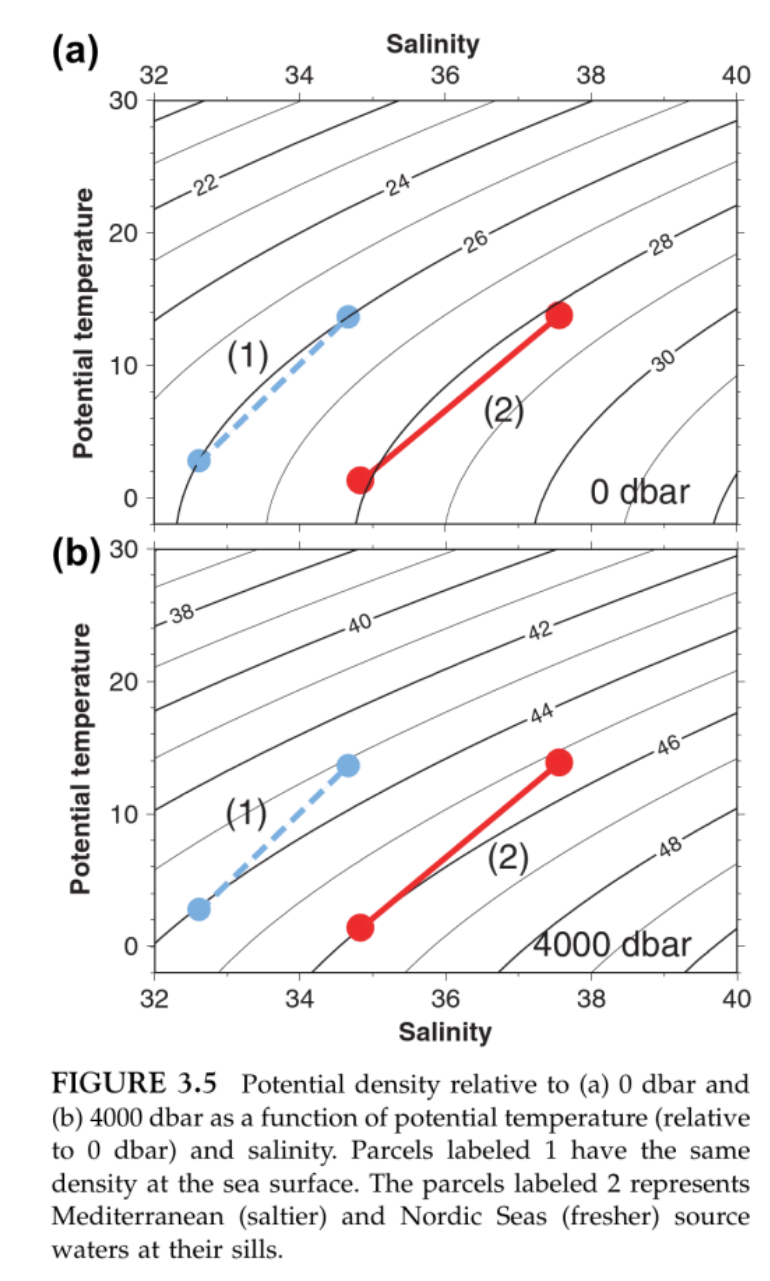

In [106]:
# Talley Fig 3.5
Image(filename = './talley_fig3.5.png', width=500)#, height=100)

### As Talley emphasizes, the concave nature of the non-linear EOS means that mixing always leads to a higher density medium.  Looks to be as much as 5% higher.  This contrasts with the linear EOS which would show almost no change.

----

# 6. Global temperature and salinity

## a) Sketch

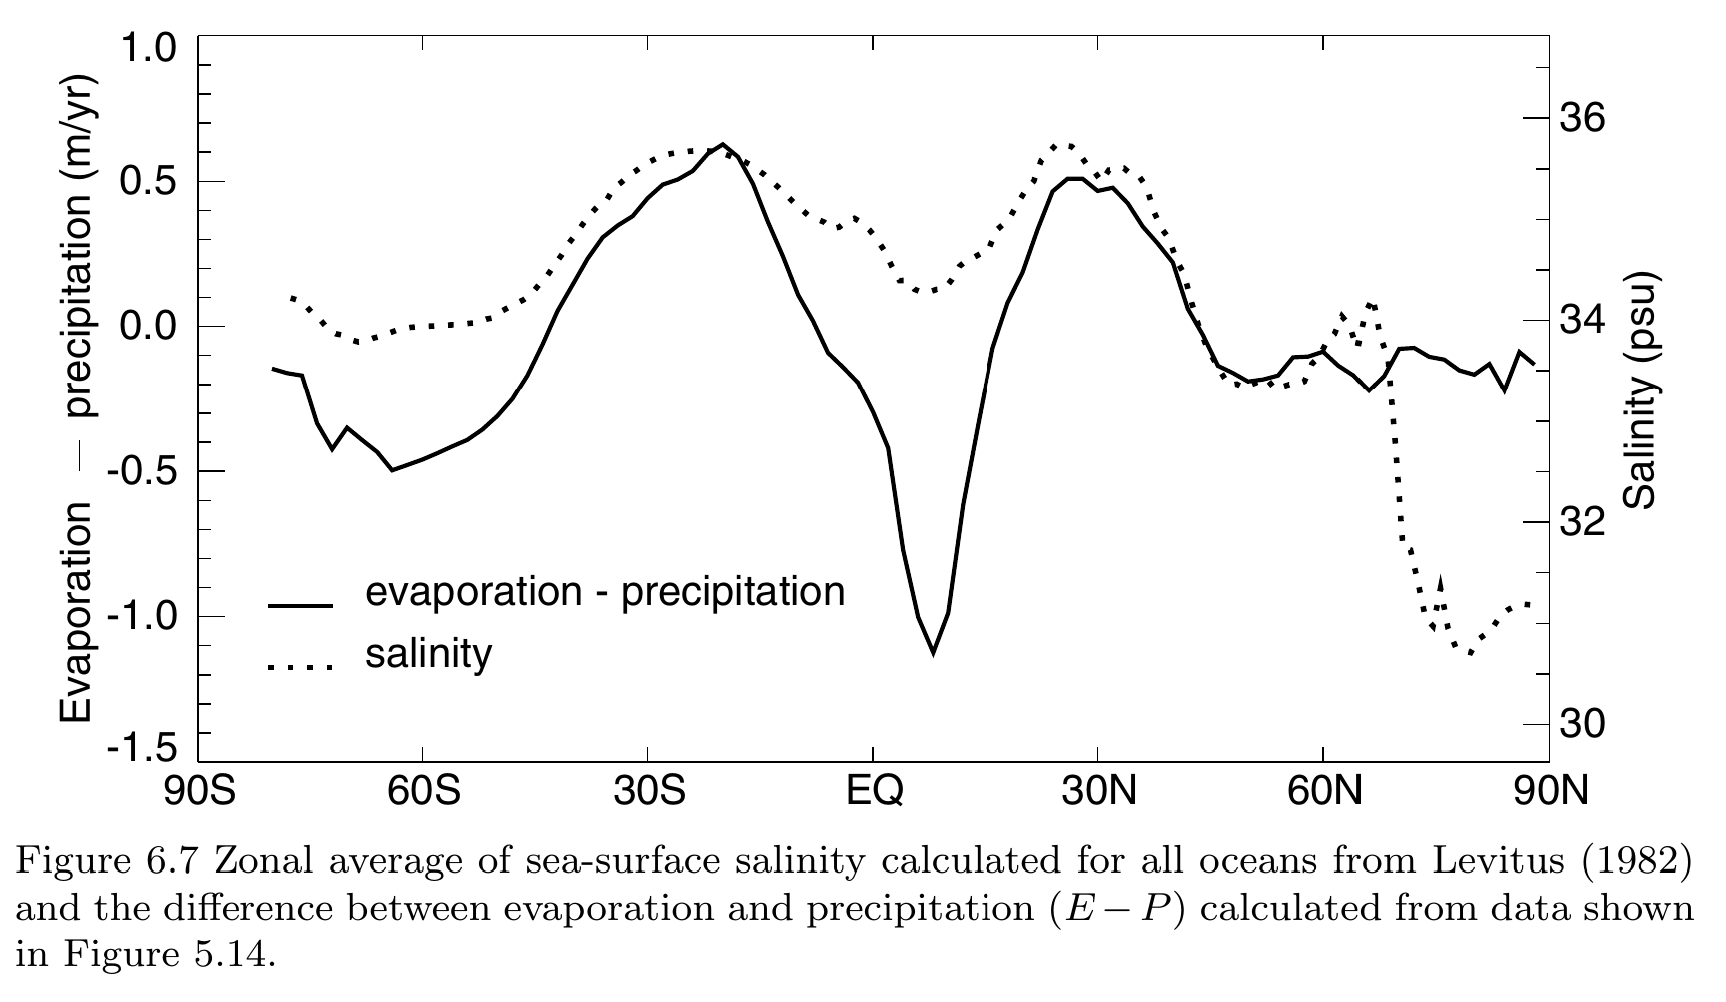

In [104]:
# Salinity
Image(filename = './salinity.png', width=500)#, height=100)

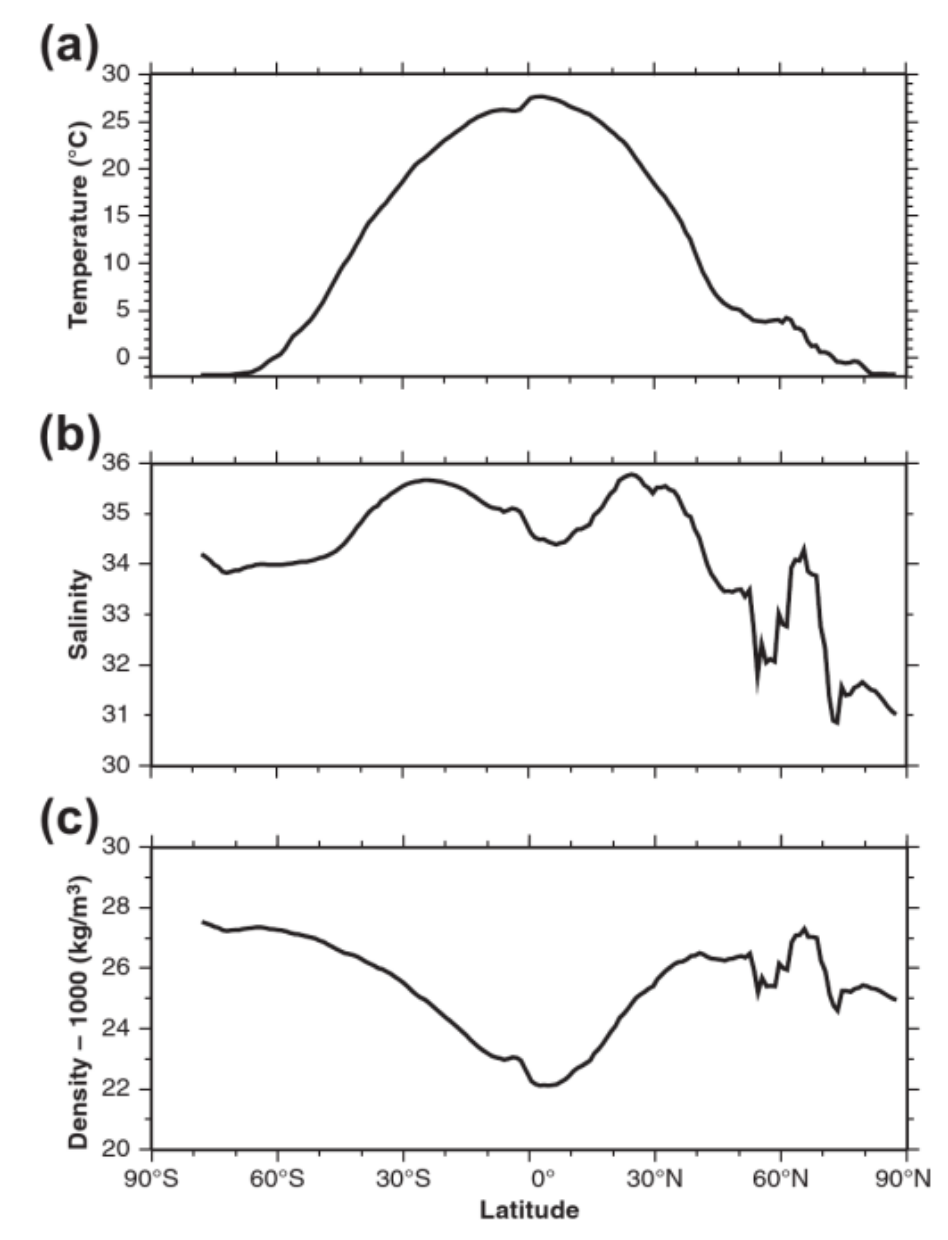

In [105]:
# all 3
Image(filename = './talley_fig4.3.png', width=500)#, height=100)

## b) Atlantic vs. Pacific

### Salinity --  To zeroth order, salinityis zonal (i.e. indepdendent of longitdue).  But the Atlantic Ocean does have a systematically higher salinity.  Apparently because water evaporated from the Atlantic is carried by winds into the Pacific.

### Temperature -- From an examination of Figure 6.3 of Stewart, there is little discernible difference in temperature between the two oceans.  It is roughly "zonal", i.e. independent of longitude.

## c) Bay of Bengal vs. Arabian Sea

### I am guessing that the Bay of Bengal has a fresh water river feeding it which reduces its salinity.